## Notebook description:

Looking at a spinup metric - between most spunup runs and the previous one, what is the percent difference?

In [50]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [51]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [52]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [53]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
#from mpl_toolkits.basemap import Basemap
#from scipy.io import loadmat
import pickle
from cmocean import cm
import warnings
import netCDF4 as nc

import importlib
from salishsea_tools import viz_tools

%matplotlib inline
warnings.simplefilter('ignore')



#### MEANS EXTRACTING CODE  - uses extract_bylayer_mean.py, which is in this folder
    


In [54]:
w = nc.Dataset('/data/tjarniko/results/BASERUN_EXP/PI5/ncs/SKOG_1d_20150101_20150130_carp_T_20150101-20150101.nc')
print(w['dissolved_inorganic_carbon'])

<class 'netCDF4._netCDF4.Variable'>
float32 dissolved_inorganic_carbon(time_counter, deptht, y, x)
    standard_name: mole_concentration_of_dissolved_inorganic_carbon_in_sea_water
    long_name: Dissolved Inorganic C Concentration
    units: mmol m-3
    online_operation: average
    interval_operation: 40 s
    interval_write: 1 d
    cell_methods: time: mean (interval: 40 s)
    cell_measures: area: area
    _FillValue: 1e+20
    missing_value: 1e+20
    coordinates: time_centered deptht nav_lat nav_lon
unlimited dimensions: time_counter
current shape = (1, 40, 898, 398)
filling on


In [55]:
import sys
sys.path.append('/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pyscripts/bylayer_extract')

#     for a given variable in raw ncs of the PILA experiment 
#     found in directory tree /data/tjarniko/results/BASERUN_EXP
#     take by-layer means of the variable throughout the timeperiod specified

tstr = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
start = '2015-01-01' #start of timeperiod
end = '2015-12-31' #end of timeperiod (typically a year)
ftype = 'carp' #type of model result .nc 
sdir = 'PI5' #where under directory tree do we find ncs 
inletmask = True #are we masking out Toba/Bute/Jervis?
varname = 'dissolved_inorganic_carbon' #name of variable
fname = tstr + 'PI5_DIC_means' #name of resulting pkl 

# import extract_bylayer_mean as ebm
#ebm.extractor(start,end,ftype,sdir, varname, fname, inletmask )

In [56]:
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

In [57]:

#dic
BR1_DIC = pickle.load(open('../pkls/BR1_DIC_means_inletsIN.pkl' , 'rb')) 
BR2_DIC = pickle.load(open('../pkls/BR2_DIC_means_inletsIN.pkl' , 'rb')) 
BR3_DIC = pickle.load(open('../pkls/BR3_DIC_means_inletsIN.pkl' , 'rb')) 
PI1_DIC = pickle.load(open('../pkls/PI1_DIC_means_inletsIN.pkl' , 'rb')) 
PI2_DIC = pickle.load(open('../pkls/PI2_DIC_means_inletsIN.pkl' , 'rb')) 
PI3rr_DIC = pickle.load(open('../pkls/PI3rr_DIC_means_inletsIN.pkl' , 'rb')) 
PI4_DIC = pickle.load(open('../pkls/PI4_DIC_means_inletsIN.pkl' , 'rb')) 
PI4_DIC[PI4_DIC == 0] = np.nan

#ta
BR1_TA = pickle.load(open('../pkls/BR1_TA_means_inletsIN.pkl' , 'rb')) 
BR2_TA = pickle.load(open('../pkls/BR2_TA_means_inletsIN.pkl' , 'rb')) 
BR3_TA = pickle.load(open('../pkls/BR3_TA_means_inletsIN.pkl' , 'rb')) 
PI1_TA = pickle.load(open('../pkls/PI1_TA_means_inletsIN.pkl' , 'rb')) 
PI2_TA = pickle.load(open('../pkls/PI2_TA_means_inletsIN.pkl' , 'rb')) 
PI3rr_TA = pickle.load(open('../pkls/PI3rr_TA_means_inletsIN.pkl' , 'rb')) 
PI4_TA = pickle.load(open('../pkls/PI4_TA_means_inletsIN.pkl' , 'rb')) 
PI4_TA[PI4_TA == 0] = np.nan
#sal
BR1_sal = pickle.load(open('../pkls/BR1_sal_means_inletsIN.pkl' , 'rb')) 
BR2_sal = pickle.load(open('../pkls/BR2_sal_means_inletsIN.pkl' , 'rb')) 
BR3_sal = pickle.load(open('../pkls/BR3_sal_means_inletsIN.pkl' , 'rb')) 
PI1_sal = pickle.load(open('../pkls/PI1_sal_means_inletsIN.pkl' , 'rb')) 
PI2_sal = pickle.load(open('../pkls/PI2_sal_means_inletsIN.pkl' , 'rb')) 
PI3rr_sal = pickle.load(open('../pkls/PI3rr_sal_means_inletsIN.pkl' , 'rb')) 
PI4_sal = pickle.load(open('../pkls/PI4_sal_means_inletsIN.pkl' , 'rb')) 
PI4_sal[PI4_sal == 0] = np.nan
#temp
BR1_temp = pickle.load(open('../pkls/BR1_temp_means_inletsIN.pkl' , 'rb')) 
BR2_temp = pickle.load(open('../pkls/BR2_temp_means_inletsIN.pkl' , 'rb')) 
BR3_temp = pickle.load(open('../pkls/BR3_temp_means_inletsIN.pkl' , 'rb')) 
PI1_temp = pickle.load(open('../pkls/PI1_temp_means_inletsIN.pkl' , 'rb')) 
PI2_temp = pickle.load(open('../pkls/PI2_temp_means_inletsIN.pkl' , 'rb')) 
PI3rr_temp = pickle.load(open('../pkls/PI3rr_temp_means_inletsIN.pkl' , 'rb')) 
# PI4_temp = pickle.load(open('../pkls/PI4_temp_means_inletsIN.pkl' , 'rb')) 
# PI4_temp[PI4_temp == 0] = np.nan
#nitrate
BR1_nit = pickle.load(open('../pkls/BR1_nit_means_inletsIN.pkl' , 'rb')) 
BR2_nit = pickle.load(open('../pkls/BR2_nit_means_inletsIN.pkl' , 'rb')) 
BR3_nit = pickle.load(open('../pkls/BR3_nit_means_inletsIN.pkl' , 'rb')) 
PI1_nit = pickle.load(open('../pkls/PI1_nit_means_inletsIN.pkl' , 'rb')) 
PI2_nit = pickle.load(open('../pkls/PI2_nit_means_inletsIN.pkl' , 'rb')) 
PI3rr_nit = pickle.load(open('../pkls/PI3rr_nit_means_inletsIN.pkl' , 'rb')) 
PI4_nit = pickle.load(open('../pkls/PI4_nit_means_inletsIN.pkl' , 'rb')) 
PI4_nit[PI4_nit == 0] = np.nan
#diatoms
BR1_diat = pickle.load(open('../pkls/BR1_diat_means_inletsIN.pkl' , 'rb')) 
BR2_diat = pickle.load(open('../pkls/BR2_diat_means_inletsIN.pkl' , 'rb')) 
BR3_diat = pickle.load(open('../pkls/BR3_diat_means_inletsIN.pkl' , 'rb')) 
PI1_diat = pickle.load(open('../pkls/PI1_diat_means_inletsIN.pkl' , 'rb')) 
PI2_diat = pickle.load(open('../pkls/PI2_diat_means_inletsIN.pkl' , 'rb')) 
PI3rr_diat = pickle.load(open('../pkls/PI3rr_diat_means_inletsIN.pkl' , 'rb')) 
PI4_diat = pickle.load(open('../pkls/PI4_diat_means_inletsIN.pkl' , 'rb')) 
PI4_diat[PI4_diat == 0] = np.nan

##PI5 for all 
PI5_DIC = pickle.load(open('../pkls/PI5_DIC_means_inletsIN.pkl' , 'rb')) 
PI5_DIC[PI5_DIC == 0] = np.nan
PI5_TA = pickle.load(open('../pkls/PI5_TA_means_inletsIN.pkl' , 'rb')) 
PI5_TA[PI5_TA == 0] = np.nan
PI5_sal = pickle.load(open('../pkls/PI5_sal_means_inletsIN.pkl' , 'rb')) 
PI5_sal[PI5_sal == 0] = np.nan
PI5_temp = pickle.load(open('../pkls/PI5_temp_means_inletsIN.pkl' , 'rb')) 
PI5_temp[PI5_temp == 0] = np.nan
PI5_nit = pickle.load(open('../pkls/PI5_nit_means_inletsIN.pkl' , 'rb')) 
PI5_nit[PI5_nit == 0] = np.nan
PI5_diat = pickle.load(open('../pkls/PI5_diat_means_inletsIN.pkl' , 'rb')) 
PI5_diat[PI5_diat == 0] = np.nan

In [58]:
def make_spinupplots(PI_var, BR_var, BR_varperc, PI_varperc, tit, tit2, brpl, pipl):
    fact = 0.9
    seg = 45
    lw = 2
    shift = 2
    tcm = cm.phase
    depth = mesh['e3t_0'][0,:,250,250]
    days_in3 = np.arange(0,365*4,1)

    fig = plt.figure(figsize=(14*fact, 14*fact))

    ##BR - units of quantity
    ax1 = plt.subplot2grid((4,3), (0,0), colspan=3, rowspan=1)
    for i in range(0,40):
        zdepth = np.sum(depth[0:i])
        if i%5 !=0: 
            ax1.plot(days_in3,BR_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
        if i%5 == 0:
            ax1.plot(days_in3,BR_var[i,:],color = tcm(1.*(i+shift)/seg),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
    ax1.grid()
    ax1.text(210,brpl,'BR3-BR1', fontsize = 16)
    ax1.text(210+365,brpl,'BR3-BR2', fontsize = 16)
    plt.axvline(x=365, color = 'r')
    plt.axvline(x=365*2, color = 'r')
    ax1.legend(loc = 'right')
    ax1.set_xlim([0,365*4])
    ax1.set_title('BR runs', fontsize = 20)
    ax1.set_ylabel('difference  \n (variable units)', fontsize = 14)


    ax1 = plt.subplot2grid((4,3), (1,0), colspan=3, rowspan=1)
    for i in range(0,40):
        zdepth = np.sum(depth[0:i])
        if i%5 !=0: 
            ax1.plot(days_in3,BR_varperc[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
        if i%5 == 0:
            ax1.plot(days_in3,BR_varperc[i,:],color = tcm(1.*(i+shift)/seg),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
    ax1.grid()
    plt.axvline(x=365, color = 'r')
    plt.axvline(x=365*3, color = 'r')
    ax1.set_xlim([0,365*4])
    ax1.set_ylabel('difference  \n (% of most spunup run)', fontsize = 14)


    ax2 = plt.subplot2grid((4,3), (2,0), colspan=3, rowspan=1)

    for i in range(0,40):
        zdepth = np.sum(depth[0:i])
        if i%5 !=0: 
            ax2.plot(days_in3,PI_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
        if i%5 == 0:
            ax2.plot(days_in3,PI_var[i,:],color = tcm(1.*(i+shift)/seg),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)

    ax2.text(230,pipl,'PI5-PI1', fontsize = 16)
    ax2.text(210+365,pipl,'PI5-PI2', fontsize = 16)
    ax2.text(110+365*2,pipl,'PI5-PI3rr', fontsize = 16)
    ax2.grid()
    plt.axvline(x=365, color = 'r')
    plt.axvline(x=365*2, color = 'r')
    plt.axvline(x=365*3, color = 'r')
    ax2.set_xlim([0,365*4])

    ax2.set_ylabel('difference  \n (variable units)', fontsize = 14)
    ax2.set_title('PI runs', fontsize = 20)

    #% runs for pi
    ax2 = plt.subplot2grid((4,3), (3,0), colspan=3, rowspan=1)

    for i in range(0,40):
        zdepth = np.sum(depth[0:i])
        if i%5 !=0: 
            ax2.plot(days_in3,PI_varperc[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
        if i%5 == 0:
            ax2.plot(days_in3,PI_varperc[i,:],color = tcm(1.*(i+shift)/seg),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)

    ax2.grid()
    ax2.set_xlabel('day of run', fontsize = 14)
    plt.axvline(x=365, color = 'r')
    plt.axvline(x=365*2, color = 'r')
    ax2.set_xlim([0,365*4])

    ax2.set_xlabel('day of run')
    ax2.set_ylabel('difference  \n (% of most spunup run)', fontsize = 14)

    plt.tight_layout()
    plt.suptitle(tit, fontsize = 20, y = 1.01)

    ### by-depth percent difference 
    fig = plt.figure(figsize=(14*fact, 7*fact))

    ##BR - units of quantity
    BR_2ndspin = BR_varperc[:,365:365*2]
    PI_3rdspin = PI_varperc[:,365*3:365*4]

    ax1 = plt.subplot2grid((1,2), (0,0), colspan=1, rowspan=1)
    zdepths = np.zeros(40); t_means = np.zeros(40); t_stds = np.zeros(40); t_maxs = np.zeros(40); t_mins = np.zeros(40);
    for i in range(0,40):
        zdepths[i] = np.sum(depth[0:i+1]) 
        t_means[i] =   np.nanmean(BR_2ndspin[i,:])
        t_stds[i] = np.nanstd(BR_2ndspin[i,:])
        t_maxs[i] = np.nanmax(BR_2ndspin[i,:])
        t_mins[i] = np.nanmin(BR_2ndspin[i,:])
    print('mean diff by layer BR')
    print(t_means)
    ax1.plot(t_means,zdepths, marker = 'o', color = 'r', label = 'mean', markersize = 10)
    ax1.plot(t_means-t_stds, zdepths, linestyle = ':',  label = 'mean +/- std. dev', color = 'r', markersize = 8)
    ax1.plot(t_means+t_stds, zdepths, linestyle = ':', color = 'r', markersize = 8)
    ax1.plot(t_maxs, zdepths, marker = '*', label = 'max/min', linestyle = 'None' ,  color = 'r', markersize = 10)
    ax1.plot(t_mins, zdepths, marker = '*', linestyle = 'None' ,  color = 'r', markersize = 10)

    ax1.fill_betweenx(zdepths, t_means-t_stds, t_means+t_stds, color = 'r', alpha = 0.2)
    ax1.invert_yaxis()
    ax1.legend(loc = 'best', fontsize = 12)
    ax1.set_ylabel('depth', fontsize = 12)
    ax1.set_xlabel('%difference of by-layer \n mean of tracer between runs', fontsize = 12)
    ax1.set_title('BR3 - BR2', fontsize = 15)

    ax2 = plt.subplot2grid((1,2), (0,1), colspan=1, rowspan=1)
    zdepths = np.zeros(40); t_means = np.zeros(40); t_stds = np.zeros(40); t_maxs = np.zeros(40); t_mins = np.zeros(40);
    for i in range(0,40):
        zdepths[i] = np.sum(depth[0:i+1]) 
        t_means[i] =   np.nanmean(PI_3rdspin[i,:])
        t_stds[i] = np.nanstd(PI_3rdspin[i,:])
        t_maxs[i] = np.nanmax(PI_3rdspin[i,:])
        t_mins[i] = np.nanmin(PI_3rdspin[i,:])
    print('mean diff by layer PI')
    print(t_means)
    ax2.plot(t_means,zdepths, marker = 'o', color = 'cornflowerblue', markersize = 10)
    ax2.plot(t_means-t_stds, zdepths, linestyle = ':',  color = 'cornflowerblue', markersize = 8)
    ax2.plot(t_means+t_stds, zdepths, linestyle = ':', color = 'cornflowerblue', markersize = 8)
    ax2.plot(t_maxs, zdepths, marker = '*', linestyle = 'None' ,  color = 'cornflowerblue', markersize = 10)
    ax2.plot(t_mins, zdepths, marker = '*', linestyle = 'None' ,  color = 'cornflowerblue', markersize = 10)
    ax2.fill_betweenx(zdepths, t_means-t_stds, t_means+t_stds, color = 'cornflowerblue', alpha = 0.2)
    ax2.set_ylabel('depth', fontsize = 12)
    ax2.set_xlabel('%difference of by-layer \n mean of tracer between runs', fontsize = 12)
    ax2.set_title('PI5 - PI4', fontsize = 15)
    ax2.invert_yaxis()
    plt.tight_layout()
    plt.suptitle(tit2, fontsize = 20, y = 1.07)

mean diff by layer BR
[ 0.13914096  0.13463922  0.13037041  0.12276724  0.1045593   0.09737265
  0.09293786  0.08848522  0.08187734  0.07462547  0.06741765  0.06097346
  0.05541208  0.05064379  0.04628604  0.0420615   0.03789418  0.03370447
  0.02932085  0.0245777   0.02032824  0.01626269  0.01355788  0.01170278
  0.00429593 -0.01081048 -0.03011389 -0.04230439 -0.04447663 -0.04069778
 -0.03199335 -0.02398288 -0.02135283 -0.02169169 -0.02306405 -0.0185688
 -0.00618912  0.00114176  0.03014008         nan]
mean diff by layer PI
[-0.09124324 -0.08985384 -0.08776525 -0.08316143 -0.07625932 -0.07520304
 -0.07540105 -0.07518203 -0.07315191 -0.07097715 -0.06967744 -0.0687579
 -0.06812236 -0.06753152 -0.06686667 -0.06622965 -0.0655504  -0.06466339
 -0.06354706 -0.06242657 -0.06097721 -0.05903549 -0.05686995 -0.05683063
 -0.05910146 -0.06026181 -0.05879086 -0.05621408 -0.05403853 -0.05314153
 -0.05821751 -0.0629855  -0.06663239 -0.06733465 -0.06758765 -0.06933201
 -0.07483528 -0.07931304 -0.0906

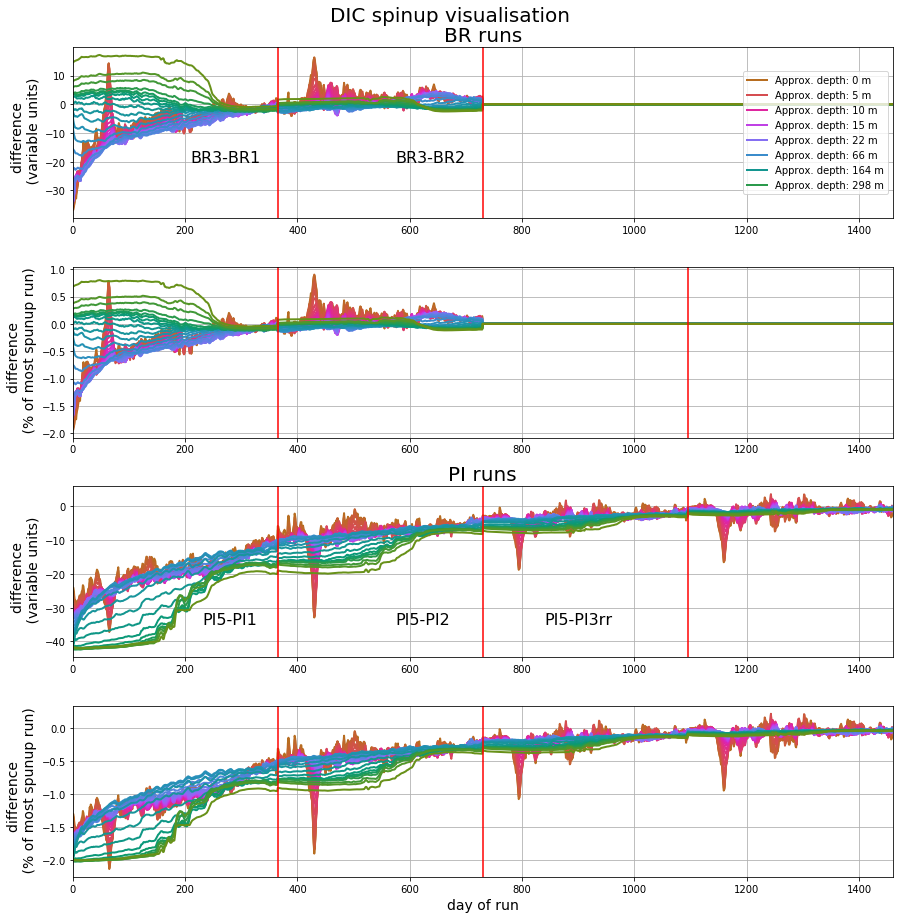

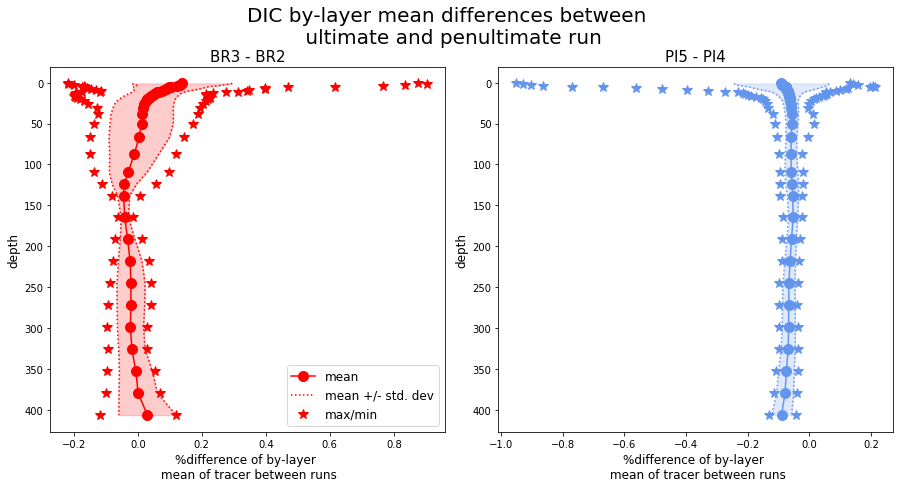

In [59]:
BR_DIC = np.zeros([40,365*4])
BR_DIC[:,0:365] = BR3_DIC- BR1_DIC
BR_DIC[:,365:2*365] = BR3_DIC - BR2_DIC
PI_DIC = np.zeros([40,365*4])
PI_DIC[:,0:365] = PI5_DIC- PI1_DIC
PI_DIC[:,365:2*365] = PI5_DIC - PI2_DIC
PI_DIC[:,365*2:3*365] = PI5_DIC - PI3rr_DIC
PI_DIC[:,365*3:4*365] = PI5_DIC - PI4_DIC


BR_DICperc = np.zeros([40,365*4])
BR_DICperc[:,0:365] = (BR3_DIC- BR1_DIC)/BR3_DIC *100
BR_DICperc[:,365:2*365] =( BR3_DIC - BR2_DIC)/BR3_DIC *100

PI_DICperc = np.zeros([40,365*4])
PI_DICperc[:,0:365] = (PI5_DIC- PI1_DIC)/PI5_DIC *100
PI_DICperc[:,365:2*365] = (PI5_DIC - PI2_DIC)/PI5_DIC *100
PI_DICperc[:,365*2:3*365] = (PI5_DIC - PI3rr_DIC)/PI5_DIC *100
PI_DICperc[:,365*3:4*365] = (PI5_DIC - PI4_DIC)/PI5_DIC *100

BR_var = BR_DIC
PI_var = PI_DIC
BR_varperc = BR_DICperc
PI_varperc = PI_DICperc
tit = 'DIC spinup visualisation'
tit2 = 'DIC by-layer mean differences between \n ultimate and penultimate run'
pipl = -35 
brpl = -20


    
make_spinupplots(PI_var, BR_var, BR_varperc, PI_varperc, tit, tit2, brpl, pipl)

In [60]:
# BR_TA = np.zeros([40,365*3])
# BR_TA[:,0:365] = BR3_TA- BR1_TA
# BR_TA[:,365:2*365] = BR3_TA - BR2_TA
# PI_TA = np.zeros([40,365*3])
# PI_TA[:,0:365] = PI4_TA- PI1_TA
# PI_TA[:,365:2*365] = PI4_TA - PI2_TA
# PI_TA[:,365*2:3*365] = PI4_TA - PI3rr_TA

# BR_TAperc = np.zeros([40,365*3])
# BR_TAperc[:,0:365] = (BR3_TA- BR1_TA)/BR3_TA *100
# BR_TAperc[:,365:2*365] =( BR3_TA - BR2_TA)/BR3_TA *100
# PI_TAperc = np.zeros([40,365*3])
# PI_TAperc[:,0:365] = (PI4_TA- PI1_TA)/PI4_TA *100
# PI_TAperc[:,365:2*365] = (PI4_TA - PI2_TA)/PI4_TA *100
# PI_TAperc[:,365*2:3*365] = (PI4_TA - PI3rr_TA)/PI4_TA *100

# BR_var = BR_TA
# PI_var = PI_TA
# BR_varperc = BR_TAperc
# PI_varperc = PI_TAperc
# tit = 'TA spinup visualisation'
# tit2 = 'TA by-layer mean differences between \n ultimate and penultimate run'
# pipl = 6 
# brpl = 20


    
# make_spinupplots(PI_var, BR_var, BR_varperc, PI_varperc, tit, tit2, brpl, pipl)

ValueError: x and y must have same first dimension, but have shapes (1460,) and (1095,)

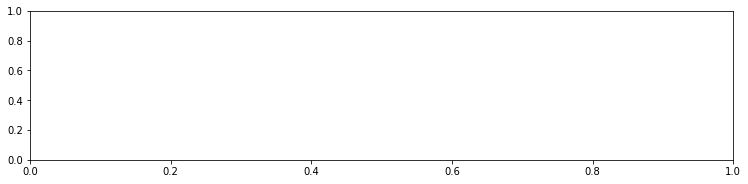

In [61]:
BR_sal = np.zeros([40,365*3])
BR_sal[:,0:365] = BR3_sal- BR1_sal
BR_sal[:,365:2*365] = BR3_sal - BR2_sal
PI_sal = np.zeros([40,365*3])
PI_sal[:,0:365] = PI4_sal- PI1_sal
PI_sal[:,365:2*365] = PI4_sal - PI2_sal
PI_sal[:,365*2:3*365] = PI4_sal - PI3rr_sal

BR_salperc = np.zeros([40,365*3])
BR_salperc[:,0:365] = (BR3_sal- BR1_sal)/BR3_sal *100
BR_salperc[:,365:2*365] =( BR3_sal - BR2_sal)/BR3_sal *100
PI_salperc = np.zeros([40,365*3])
PI_salperc[:,0:365] = (PI4_sal- PI1_sal)/PI4_sal *100
PI_salperc[:,365:2*365] = (PI4_sal - PI2_sal)/PI4_sal *100
PI_salperc[:,365*2:3*365] = (PI4_sal - PI3rr_sal)/PI4_sal *100

BR_var = BR_sal
PI_var = PI_sal
BR_varperc = BR_salperc
PI_varperc = PI_salperc
tit = 'sal spinup visualisation'
tit2 = 'sal by-layer mean differences between \n ultimate and penultimate run'
pipl = 0 
brpl = 0


    
make_spinupplots(PI_var, BR_var, BR_varperc, PI_varperc, tit, tit2, brpl, pipl)

In [ ]:
BR_temp = np.zeros([40,365*3])
BR_temp[:,0:365] = BR3_temp- BR1_temp
BR_temp[:,365:2*365] = BR3_temp - BR2_temp
PI_temp = np.zeros([40,365*3])
PI_temp[:,0:365] = PI4_temp- PI1_temp
PI_temp[:,365:2*365] = PI4_temp - PI2_temp
PI_temp[:,365*2:3*365] = PI4_temp - PI3rr_temp

BR_tempperc = np.zeros([40,365*3])
BR_tempperc[:,0:365] = (BR3_temp- BR1_temp)/BR3_temp *100
BR_tempperc[:,365:2*365] =( BR3_temp - BR2_temp)/BR3_temp *100
PI_tempperc = np.zeros([40,365*3])
PI_tempperc[:,0:365] = (PI4_temp- PI1_temp)/PI4_temp *100
PI_tempperc[:,365:2*365] = (PI4_temp - PI2_temp)/PI4_temp *100
PI_tempperc[:,365*2:3*365] = (PI4_temp - PI3rr_temp)/PI4_temp *100

BR_var = BR_temp
PI_var = PI_temp
BR_varperc = BR_tempperc
PI_varperc = PI_tempperc
tit = 'temp spinup visualisation'
tit2 = 'temp by-layer mean differences between \n ultimate and penultimate run'
pipl = 0 
brpl = 0

    
make_spinupplots(PI_var, BR_var, BR_varperc, PI_varperc, tit, tit2, brpl, pipl)

In [ ]:
BR_nit = np.zeros([40,365*3])
BR_nit[:,0:365] = BR3_nit- BR1_nit
BR_nit[:,365:2*365] = BR3_nit - BR2_nit
PI_nit = np.zeros([40,365*3])
PI_nit[:,0:365] = PI4_nit- PI1_nit
PI_nit[:,365:2*365] = PI4_nit - PI2_nit
PI_nit[:,365*2:3*365] = PI4_nit - PI3rr_nit

BR_nitperc = np.zeros([40,365*3])
BR_nitperc[:,0:365] = (BR3_nit- BR1_nit)/BR3_nit *100
BR_nitperc[:,365:2*365] =( BR3_nit - BR2_nit)/BR3_nit *100
PI_nitperc = np.zeros([40,365*3])
PI_nitperc[:,0:365] = (PI4_nit- PI1_nit)/PI4_nit *100
PI_nitperc[:,365:2*365] = (PI4_nit - PI2_nit)/PI4_nit *100
PI_nitperc[:,365*2:3*365] = (PI4_nit - PI3rr_nit)/PI4_nit *100

BR_var = BR_nit
PI_var = PI_nit
BR_varperc = BR_nitperc
PI_varperc = PI_nitperc
tit = 'nit spinup visualisation'
tit2 = 'nit by-layer mean differences between \n ultimate and penultimate run'
pipl = 0 
brpl = 0

    
make_spinupplots(PI_var, BR_var, BR_varperc, PI_varperc, tit, tit2, brpl, pipl)

In [ ]:
BR_diat = np.zeros([40,365*3])
BR_diat[:,0:365] = BR3_diat- BR1_diat
BR_diat[:,365:2*365] = BR3_diat - BR2_diat
PI_diat = np.zeros([40,365*3])
PI_diat[:,0:365] = PI4_diat- PI1_diat
PI_diat[:,365:2*365] = PI4_diat - PI2_diat
PI_diat[:,365*2:3*365] = PI4_diat - PI3rr_diat

BR_diatperc = np.zeros([40,365*3])
BR_diatperc[:,0:365] = (BR3_diat- BR1_diat)/BR3_diat *100
BR_diatperc[:,365:2*365] =( BR3_diat - BR2_diat)/BR3_diat *100
PI_diatperc = np.zeros([40,365*3])
PI_diatperc[:,0:365] = (PI4_diat- PI1_diat)/PI4_diat *100
PI_diatperc[:,365:2*365] = (PI4_diat - PI2_diat)/PI4_diat *100
PI_diatperc[:,365*2:3*365] = (PI4_diat - PI3rr_diat)/PI4_diat *100

BR_var = BR_diat
PI_var = PI_diat
BR_varperc = BR_diatperc
PI_varperc = PI_diatperc
tit = 'diat spinup visualisation'
tit2 = 'diat by-layer mean differences between \n ultimate and penultimate run'
pipl = 0 
brpl = 0

    
make_spinupplots(PI_var, BR_var, BR_varperc, PI_varperc, tit, tit2, brpl, pipl)

#### THE DIFFERENCES IN THE NON-DIC/TA FIELDS IN THE PI4-PI3RR ARE FREAKISHLY SMALL, BUT THIS MAKES SENSE . AS A REMINDER, TO AVOID DRIFT, WE JUST SET ALL OF THEM TO BE THE SAME AS AT THE BEGINNING OF BR3 AT THE START OF BOTH PI3RR AND PI4. LET'S QUICKLY VISUALISE SOME DIFFERENCES...

In [ ]:

tnc = 'SKOG_1d_20151117_20151216_ptrc_T_20151206-20151206.nc'
pi4dir = '/data/tjarniko/results/BASERUN_EXP/PILA4/PI4/ncs/'
pi3rrdir = '/data/tjarniko/results/BASERUN_EXP/PILA3_rerun/PI3/ncs/'

pi3nc = nc.Dataset(pi3rrdir + tnc)
pi4nc = nc.Dataset(pi4dir + tnc)

pidiff = pi4nc['nitrate'][:] - pi3nc['nitrate'][:]

fact = 0.9
fig = plt.figure(figsize=(12*fact,6.5*fact))

ax0 = fig.add_subplot(1,2,1)
#toba and bute

im = ax0.pcolormesh(pidiff[0,0,:,:], cmap=cm.balance_r)

viz_tools.set_aspect(ax0)

pidiff[0,0,250:260,250:260]

In [ ]:

tnc = 'SKOG_1d_20150401_20150430_ptrc_T_20150415-20150415.nc'
pi4dir = '/data/tjarniko/results/BASERUN_EXP/PILA4/PI4/ncs/'
pi3rrdir = '/data/tjarniko/results/BASERUN_EXP/PILA3_rerun/PI3/ncs/'

pi3nc = nc.Dataset(pi3rrdir + tnc)
pi4nc = nc.Dataset(pi4dir + tnc)

pidiff = pi4nc['diatoms'][:] - pi3nc['diatoms'][:]

fact = 0.9
fig = plt.figure(figsize=(12*fact,6.5*fact))

ax0 = fig.add_subplot(1,2,2)
#toba and bute

im = ax0.pcolormesh(pidiff[0,0,:,:], cmap=cm.balance_r)
plt.title('difference in diatoms - pi4 - pi3rr \n (seems identically 0)')
viz_tools.set_aspect(ax0)

ax1 = fig.add_subplot(1,2,1)
#toba and bute

im = ax1.pcolormesh(pi4nc['diatoms'][0,0,:,:], cmap=cm.balance_r)
plt.title('diatoms - day 15apr, pi4 run')
viz_tools.set_aspect(ax1)
plt.colorbar(im)

print(pidiff[0,0,250:260,250:260])



In [ ]:

tnc = 'SKOG_1d_20150630_20150729_grid_T_20150715-20150715.nc'
pi4dir = '/data/tjarniko/results/BASERUN_EXP/PILA4/PI4/ncs/'
pi3rrdir = '/data/tjarniko/results/BASERUN_EXP/PILA3_rerun/PI3/ncs/'

pi3nc = nc.Dataset(pi3rrdir + tnc)
pi4nc = nc.Dataset(pi4dir + tnc)

pidiff = pi4nc['votemper'][:] - pi3nc['votemper'][:]

fact = 0.9
fig = plt.figure(figsize=(12*fact,6.5*fact))

ax0 = fig.add_subplot(1,2,2)
#toba and bute

im = ax0.pcolormesh(pidiff[0,0,:,:], cmap=cm.balance_r)
plt.title('difference in temp - pi4 - pi3rr \n (seems identically 0)')
viz_tools.set_aspect(ax0)

ax1 = fig.add_subplot(1,2,1)
#toba and bute

im = ax1.pcolormesh(pi4nc['votemper'][0,0,:,:], cmap=cm.balance_r)
plt.title('temperature - day 15jul, pi4 run')
viz_tools.set_aspect(ax1)
plt.colorbar(im)

print(pidiff[0,0,250:260,250:260])

